# EDA OF TITANIC DATASET

## Importing libraries

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
df=sns.load_dataset("titanic")

In [78]:
df.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


## Data Preprocessing

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [81]:
df.nunique()

survived         2
pclass           3
sex              2
age             88
sibsp            7
parch            7
fare           248
embarked         3
class            3
who              3
adult_male       2
deck             7
embark_town      3
alive            2
alone            2
dtype: int64

In [82]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [83]:
df.shape

(891, 15)

In [84]:
df.size

13365

In [85]:
df.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [17]:
#Number of missing values in columns
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

## Dropping columns pclass,embarked,alive

In [86]:
df.drop(['pclass','embarked','alive'],axis=1)

,survived,sex,age,sibsp,parch,fare,class,who,adult_male,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,man,True,NaN,Southampton,False
1,1,female,38.0,1,0,71.2833,First,woman,False,C,Cherbourg,False
2,1,female,26.0,0,0,7.9250,Third,woman,False,NaN,Southampton,True
3,1,female,35.0,1,0,53.1000,First,woman,False,C,Southampton,False
4,0,male,35.0,0,0,8.0500,Third,man,True,NaN,Southampton,True
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,male,27.0,0,0,13.0000,Second,man,True,NaN,Southampton,True
887,1,female,19.0,0,0,30.0000,First,woman,False,B,Southampton,True
888,0,female,NaN,1,2,23.4500,Third,woman,False,NaN,Southampton,False
889,1,male,26.0,0,0,30.0000,First,man,True,C,Cherbourg,True


In [87]:
#Total number of persons survived 
df['survived'].value_counts()

survived
0    549
1    342
Name: count, dtype: int64

In [88]:
#ALL the decks on titanic
df.deck.unique()

[NaN, 'C', 'E', 'G', 'D', 'A', 'B', 'F']
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [26]:
# Name of all the embarking ports
df.embark_town.unique()

array(['Southampton', 'Cherbourg', 'Queenstown', nan], dtype=object)

In [89]:
# Total number of survived persons on the basis of gender
df.groupby(['survived','sex'])['survived'].count()

survived  sex   
0         female     81
          male      468
1         female    233
          male      109
Name: survived, dtype: int64

In [90]:
# Total number of survived persons on the each deck
df.groupby(['survived','deck'])['survived'].count()

survived  deck
0         A        8
          B       12
          C       24
          D        8
          E        8
          F        5
          G        2
1         A        7
          B       35
          C       35
          D       25
          E       24
          F        8
          G        2
Name: survived, dtype: int64

In [ ]:
# Deck on which maximum person survived /not survived

In [47]:
df2=df.groupby(['survived','deck'])['survived'].count()

In [57]:
#Not survived
df2.loc[0].idxmax()

'C'

In [59]:
#Survived
df2.loc[1].idxmax()

'B'

In [71]:
# Maximum gae passenger
df['age'].max()

80.0

In [91]:
#Details of maximum age passenger
df.loc[df['age'].idxmax()]

survived                 1
pclass                   1
sex                   male
age                   80.0
sibsp                    0
parch                    0
fare                  30.0
embarked                 S
class                First
who                    man
adult_male            True
deck                     A
embark_town    Southampton
alive                  yes
alone                 True
Name: 630, dtype: object

In [92]:
#Minimum age of person on titanic
df['age'].min()

0.42

In [93]:
# Details of minimum age passenger on titanic
df.loc[df['age'].idxmin()]

survived               1
pclass                 3
sex                 male
age                 0.42
sibsp                  0
parch                  1
fare              8.5167
embarked               C
class              Third
who                child
adult_male         False
deck                 NaN
embark_town    Cherbourg
alive                yes
alone              False
Name: 803, dtype: object

## Details of maximum and minimum age passenger by sex

In [94]:
df.groupby('sex')['age'].max()

sex
female    63.0
male      80.0
Name: age, dtype: float64

In [95]:
df.loc[df.groupby('sex')['age'].idxmax()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
275,1,1,female,63.0,1,0,77.9583,S,First,woman,False,D,Southampton,yes,False
630,1,1,male,80.0,0,0,30.0000,S,First,man,True,A,Southampton,yes,True


In [96]:
df.groupby('sex')['age'].min()

sex
female    0.75
male      0.42
Name: age, dtype: float64

In [97]:
df.loc[df.groupby('sex')['age'].idxmin()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
469,1,3,female,0.75,2,1,19.2583,C,Third,child,False,NaN,Cherbourg,yes,False
803,1,3,male,0.42,0,1,8.5167,C,Third,child,False,NaN,Cherbourg,yes,False


## Sorting values on basis of class,gender,deck

In [98]:
df.groupby('class')['survived'].mean().sort_values(ascending=False)

class
First     0.629630
Second    0.472826
Third     0.242363
Name: survived, dtype: float64

In [99]:
df.groupby('who')['survived'].mean().sort_values(ascending=False)

who
woman    0.756458
child    0.590361
man      0.163873
Name: survived, dtype: float64

In [100]:
df.groupby('deck')['survived'].sum().sort_values(ascending=False)

deck
B    35
C    35
D    25
E    24
F     8
A     7
G     2
Name: survived, dtype: int64

In [101]:
df.groupby('sex')['survived'].mean().sort_values(ascending=False)

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

In [102]:
df.groupby('embarked')['survived'].mean()

embarked
C    0.553571
Q    0.389610
S    0.336957
Name: survived, dtype: float64

## Titanic Passenger Classification by Number of Dependents: Parch and Sibling Distribution

In [103]:
df2=df.loc[(df['parch']!=0)&(df['sibsp']!=0)]
df2.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
13,0,3,male,39.0,1,5,31.2750,S,Third,man,True,NaN,Southampton,no,False
16,0,3,male,2.0,4,1,29.1250,Q,Third,child,False,NaN,Queenstown,no,False
24,0,3,female,8.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
25,1,3,female,38.0,1,5,31.3875,S,Third,woman,False,NaN,Southampton,yes,False
27,0,1,male,19.0,3,2,263.0000,S,First,man,True,C,Southampton,no,False
43,1,2,female,3.0,1,2,41.5792,C,Second,child,False,NaN,Cherbourg,yes,False
50,0,3,male,7.0,4,1,39.6875,S,Third,child,False,NaN,Southampton,no,False
58,1,2,female,5.0,1,2,27.7500,S,Second,child,False,NaN,Southampton,yes,False


In [104]:
# Number of person survived
df2.groupby('survived')['survived'].count()

survived
0    80
1    62
Name: survived, dtype: int64

In [105]:
df2.count()

survived       142
pclass         142
sex            142
age            126
sibsp          142
parch          142
fare           142
embarked       142
class          142
who            142
adult_male     142
deck            31
embark_town    142
alive          142
alone          142
dtype: int64

In [107]:
# Total number of persons having parch/sibsp
df2.shape[0]

142

In [115]:
df2.groupby('sex')['fare'].max()

sex
female    263.0
male      263.0
Name: fare, dtype: float64

In [116]:
df2.groupby('sex')['fare'].min()

sex
female    7.9250
male      7.2292
Name: fare, dtype: float64

In [110]:
df3=df.groupby('sex')['fare'].max()
df3.head()

sex
female    512.3292
male      512.3292
Name: fare, dtype: float64

In [114]:
df.loc[df2['fare'].idxmin()]

survived               0
pclass                 3
sex                 male
age                 15.0
sibsp                  1
parch                  1
fare              7.2292
embarked               C
class              Third
who                child
adult_male         False
deck                 NaN
embark_town    Cherbourg
alive                 no
alone              False
Name: 352, dtype: object

In [117]:
df2.groupby('class')['survived'].sum()

class
First     18
Second    25
Third     19
Name: survived, dtype: int64

## Data visualization 

# Survival rate by passenger class

In [118]:
x=df.groupby('class')['survived'].sum().tolist()
print(x)
y=df['class'].unique().tolist()
print(y)

[136, 87, 119]
['Third', 'First', 'Second']


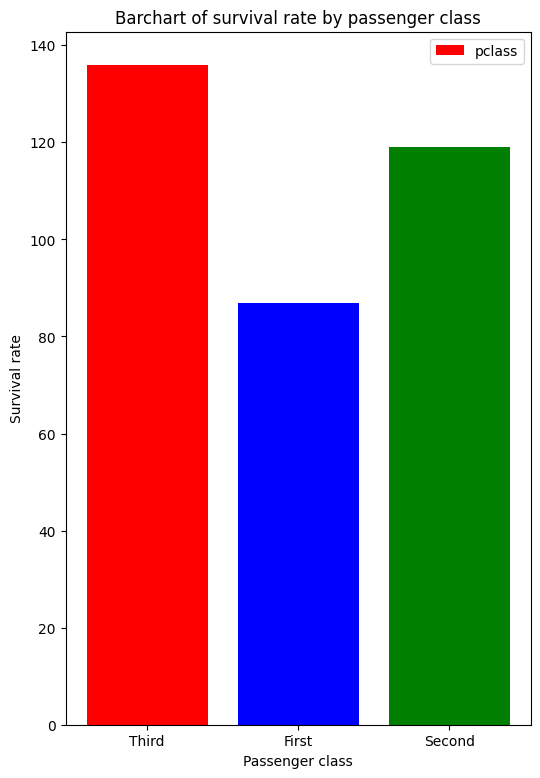

In [119]:
plt.figure(figsize=(6,9))
plt.bar(y,x,color=['r','b','g'],label="pclass")
plt.title("Barchart of survival rate by passenger class")
plt.xlabel("Passenger class")
plt.ylabel("Survival rate")
plt.legend()
plt.show()

## Survival rate by sex 

In [120]:
x=df.groupby('sex')['survived'].sum().tolist()
print(x)
y=df['sex'].unique().tolist()
print(y)

[233, 109]
['male', 'female']


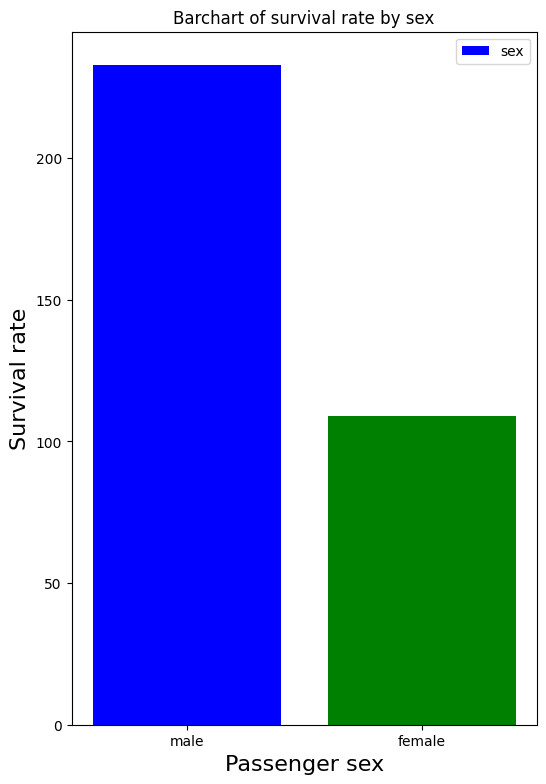

In [121]:
plt.figure(figsize=(6,9))
plt.bar(y,x,color=['b','g'],label="sex")
plt.title("Barchart of survival rate by sex")
plt.xlabel("Passenger sex",fontsize=16)
plt.ylabel("Survival rate",fontsize=16)
plt.legend()
plt.show()

## Survival rate by age 

In [122]:
df2=df[df['survived']==1]

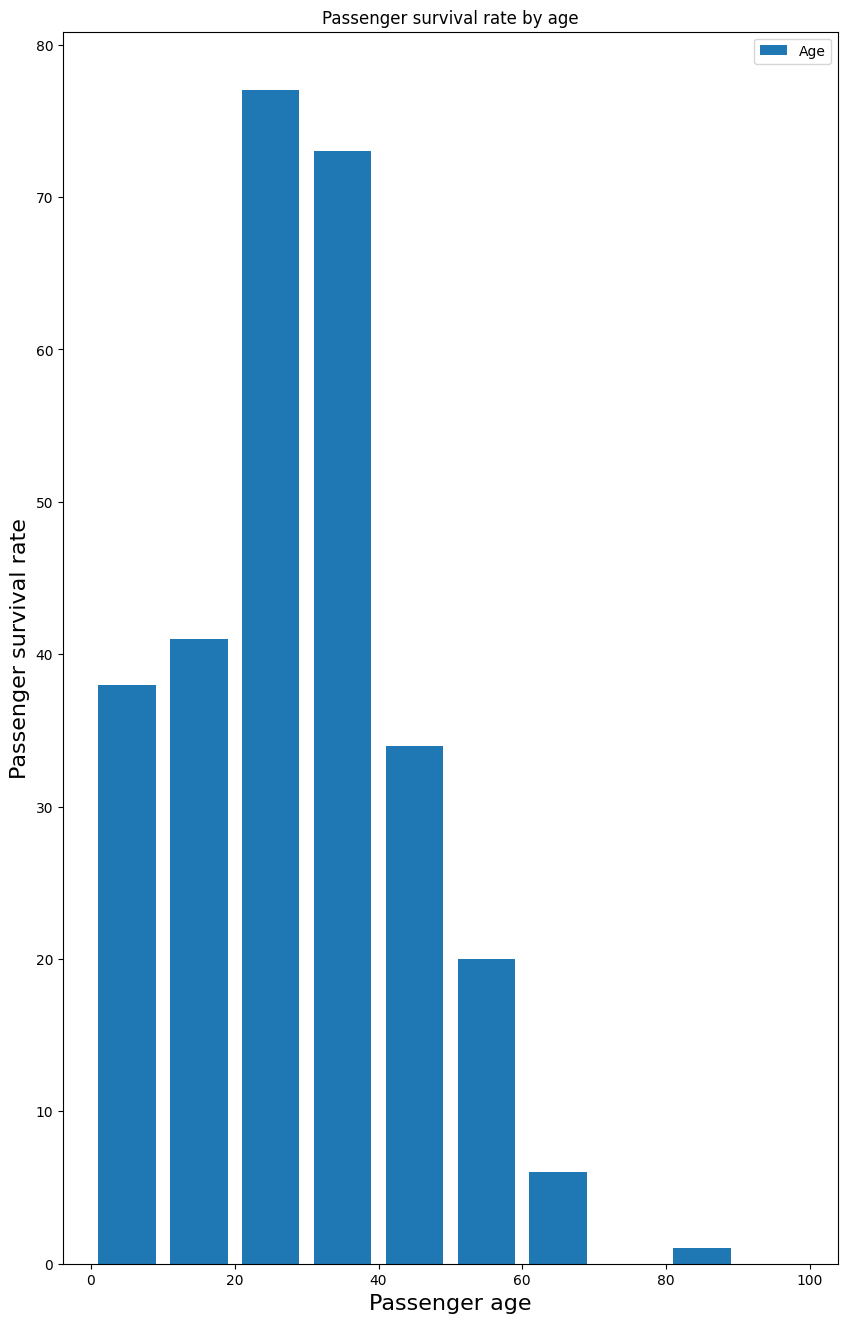

In [123]:
values = np.linspace(0,100, num=11).tolist()
plt.figure(figsize=(10,16))
plt.hist(df2['age'],bins=values,rwidth=0.8,label="Age")
plt.title("Passenger survival rate by age")
plt.xlabel("Passenger age",fontsize=16)
plt.ylabel("Passenger survival rate",fontsize=16)
plt.legend()
plt.show()

## Survival rate by embarkation port 

In [124]:
df2=df2.dropna(subset=['embark_town'])
df2['embark_town'].isnull().sum()
#v=df2['embark_town'].unique().tolist()

0

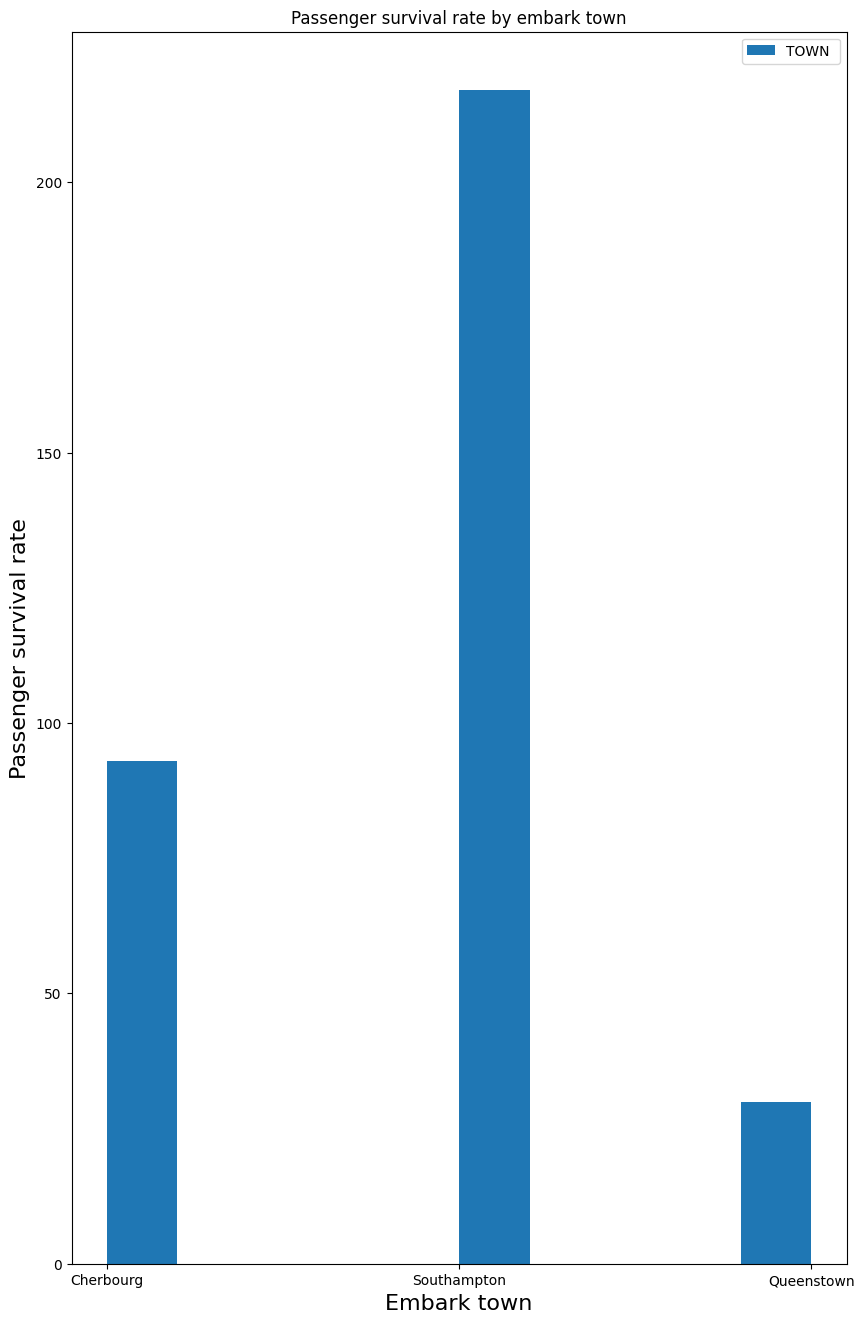

In [126]:
plt.figure(figsize=(10,16))
plt.hist(df2['embark_town'],label="TOWN ")
plt.title("Passenger survival rate by embark town")
plt.xlabel("Embark town",fontsize=16)
plt.ylabel("Passenger survival rate",fontsize=16)
plt.legend()
plt.show()

## Distribution of age 

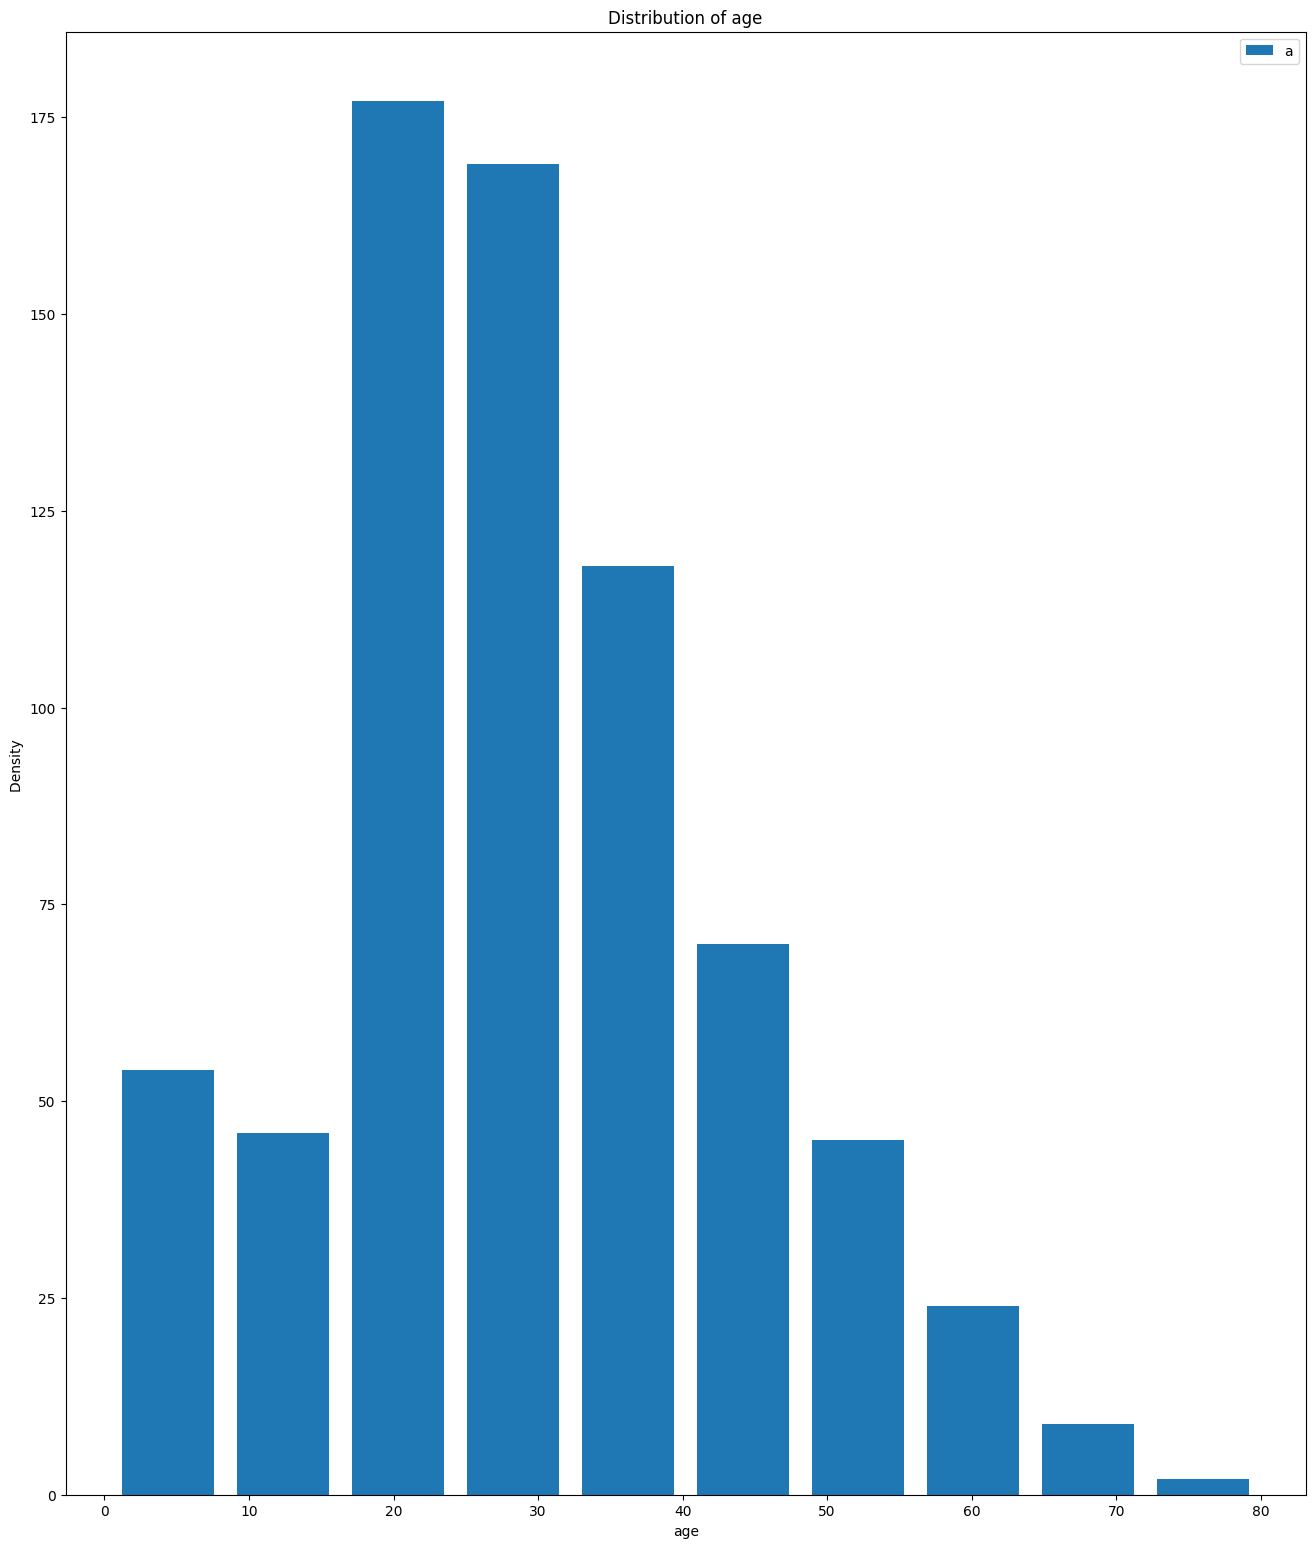

In [127]:
plt.figure(figsize=(16,19))
plt.hist(df['age'],bins=10,rwidth=0.8)
plt.title("Distribution of age")
plt.xlabel("age")
plt.ylabel("Density ")
plt.legend(labels="age")
plt.show()

## Distribution of fare 

In [128]:
x=df['fare'].max()
y=df['fare'].min()
print("max fare is ",x," mininmum fare is ", y)

max fare is  512.3292  mininmum fare is  0.0


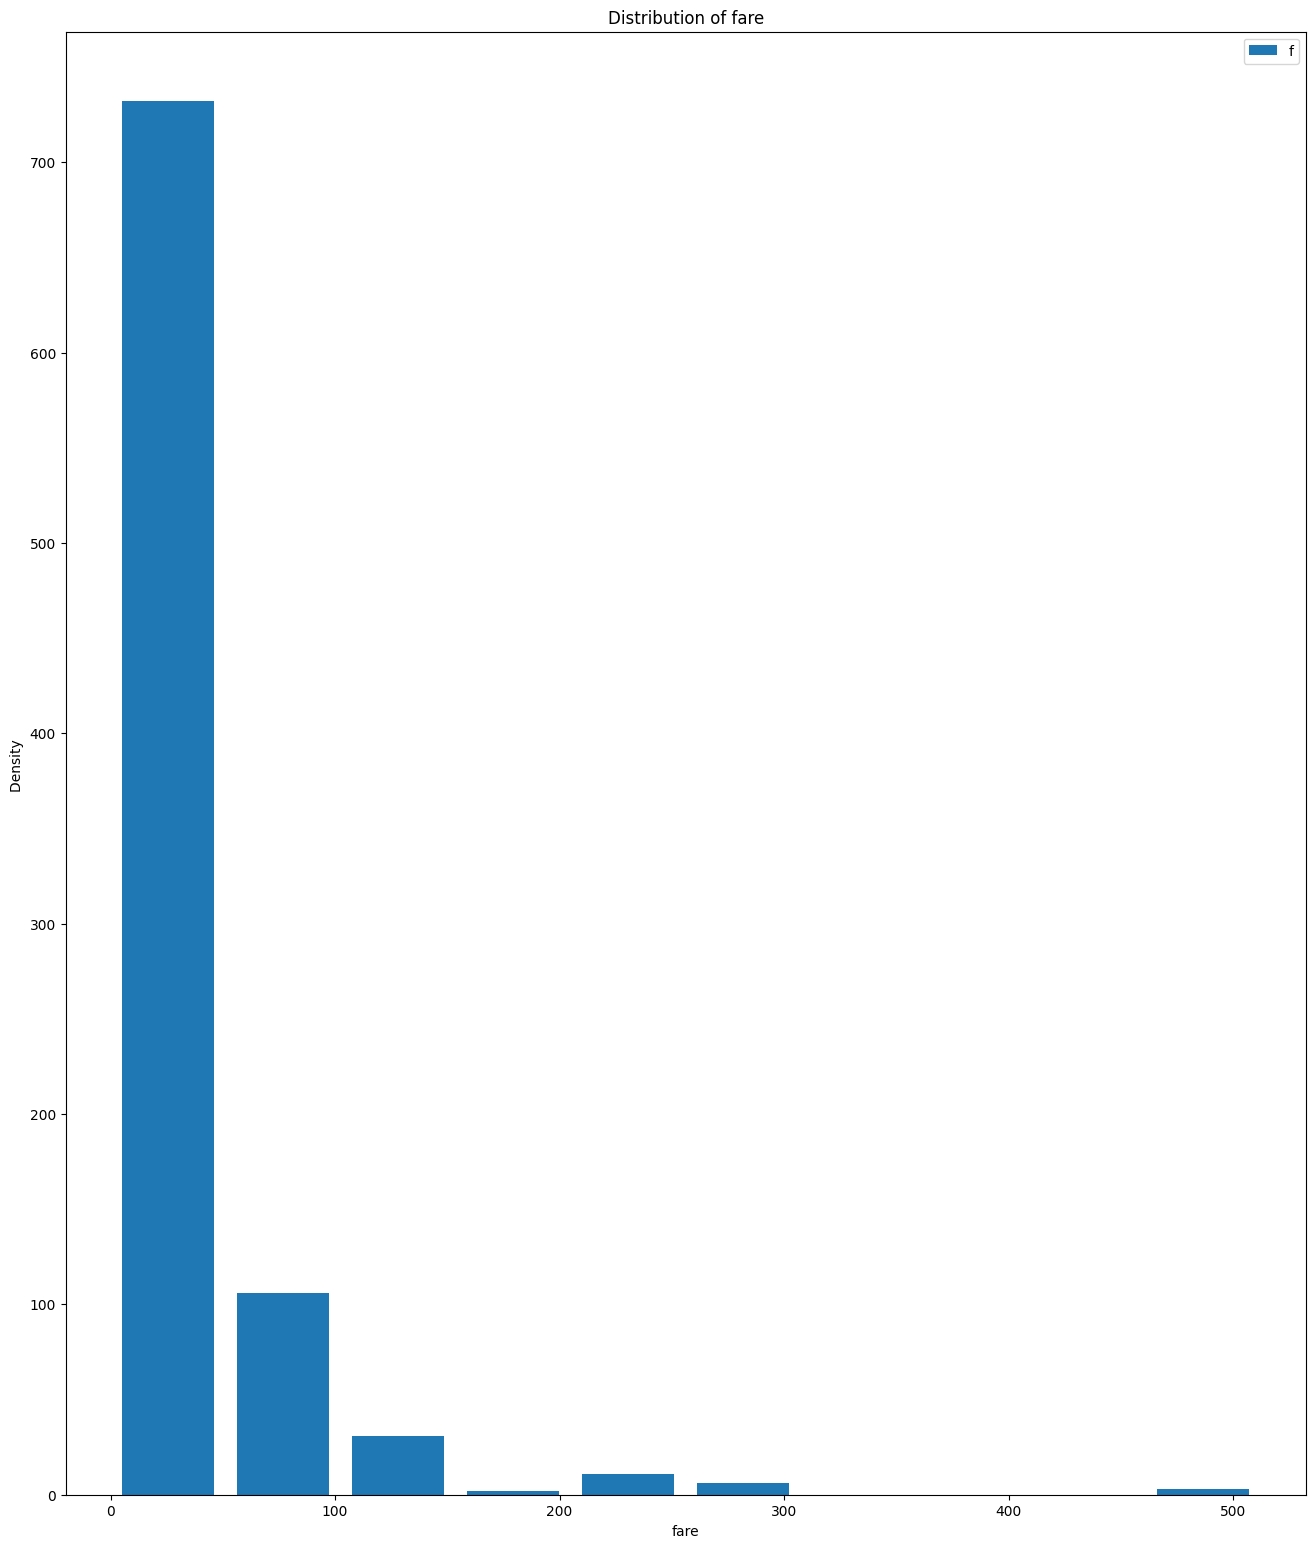

In [129]:
plt.figure(figsize=(16,19))
plt.hist(df['fare'],bins=10,rwidth=0.8)
plt.title("Distribution of fare")
plt.xlabel("fare")
plt.ylabel("Density ")
plt.legend(labels="fare")
plt.show()

## Distribution of fare by gender 

In [130]:
x=df[df['sex']=='male']['fare']
y=df[df['sex']=='female']['fare']

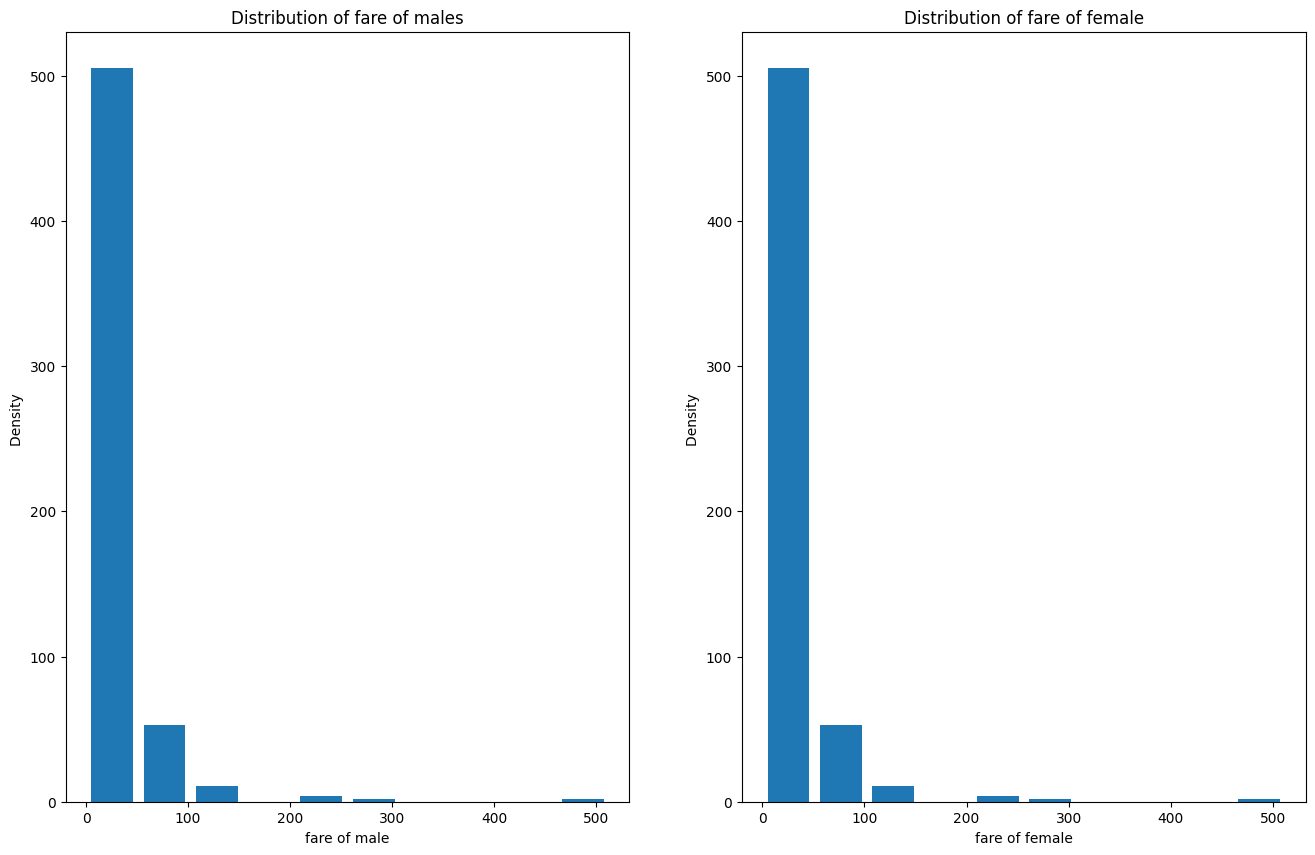

In [131]:
plt.figure(figsize=(16,10))
plt.subplot(1,2,1)
plt.hist(x,bins=10,rwidth=0.8)
plt.title('Distribution of fare of males')
plt.xlabel('fare of male')
plt.ylabel('Density ')
plt.subplot(1,2,2)
plt.hist(x,bins=10,rwidth=0.8)
plt.title('Distribution of fare of female')
plt.xlabel('fare of female')
plt.ylabel('Density ')
plt.show()

## Distribution of number of siblings/spouses (SibSp) 

In [132]:
x=df['sibsp'].unique().tolist()
x.sort()

In [133]:
y=df.groupby('sibsp')['sibsp'].count().tolist()
y

[608, 209, 28, 16, 18, 5, 7]

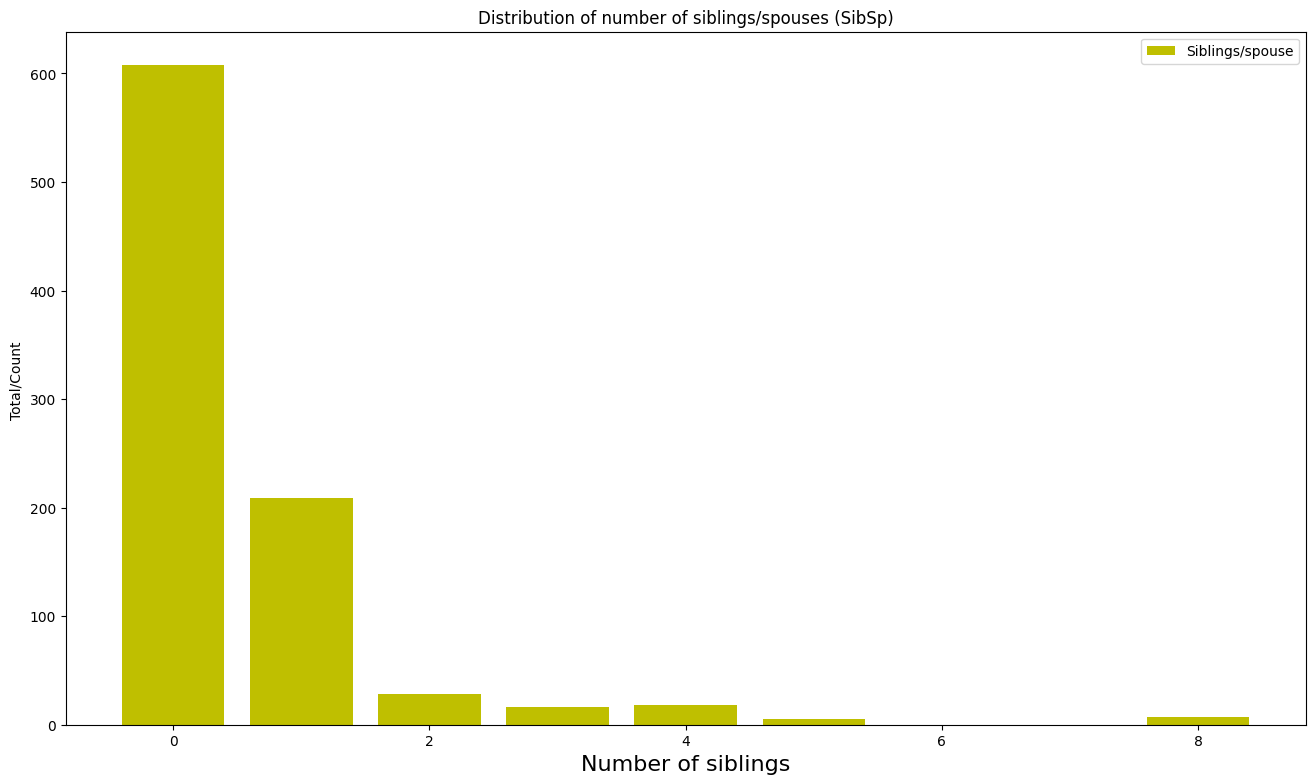

In [134]:
plt.figure(figsize=(16,9))
plt.bar(x,y,width=0.8,color='y',label="Siblings/spouse")
plt.title("Distribution of number of siblings/spouses (SibSp)")
plt.xlabel("Number of siblings",fontsize=16)
plt.ylabel("Total/Count ")
plt.legend()
plt.show()

## Distribution of number of parents/children (Parch)

In [135]:
x=df['parch'].unique().tolist()
x.sort()
y=df.groupby('parch')['parch'].count().tolist()
print("Number of siblings :",x,"\nTotal count :",y)

Number of siblings : [0, 1, 2, 3, 4, 5, 6] 
Total count : [678, 118, 80, 5, 4, 5, 1]


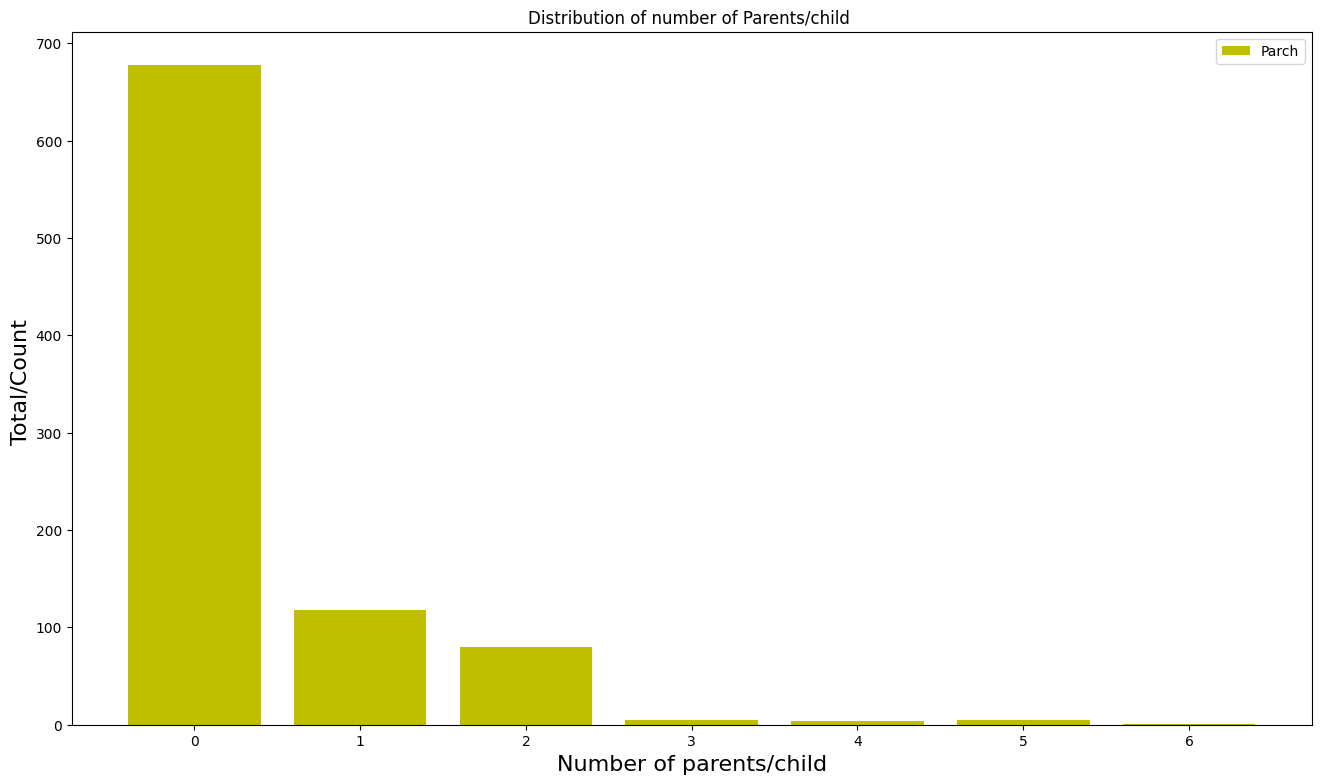

In [136]:
plt.figure(figsize=(16,9))
plt.bar(x,y,width=0.8,color='y',label="Parch")
plt.title("Distribution of number of Parents/child ")
plt.xlabel("Number of parents/child",fontsize=16)
plt.ylabel("Total/Count ",fontsize=16)
plt.legend()
plt.show()

## Fare vs. survival rate 

In [137]:
df["survived"].isnull().sum()

0

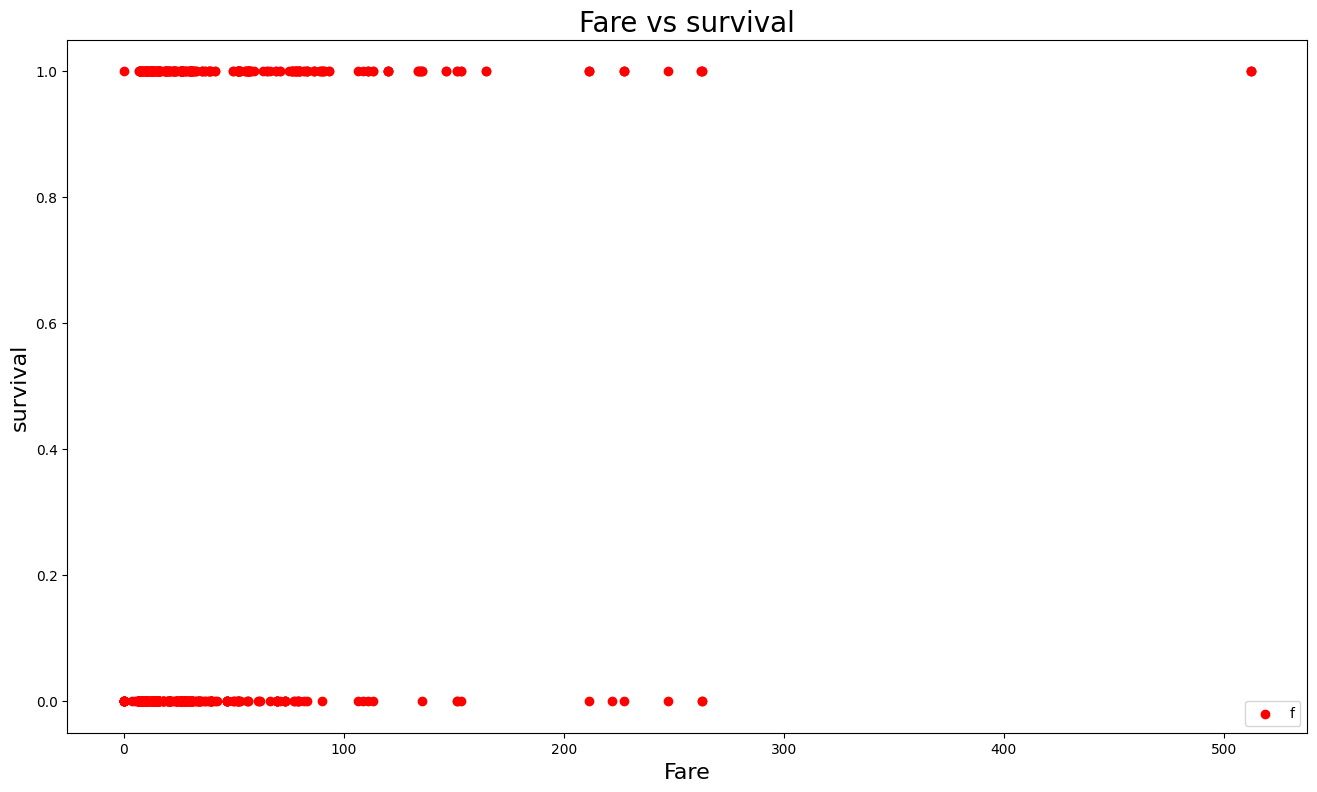

In [138]:
plt.figure(figsize=(16,9))
plt.scatter(df['fare'],df['survived'],c='r')
plt.title("Fare vs survival",fontsize=20)
plt.xlabel("Fare",fontsize=16)
plt.ylabel("survival",fontsize=16)
plt.legend("fares")
plt.show()

## Age vs. Pclass 

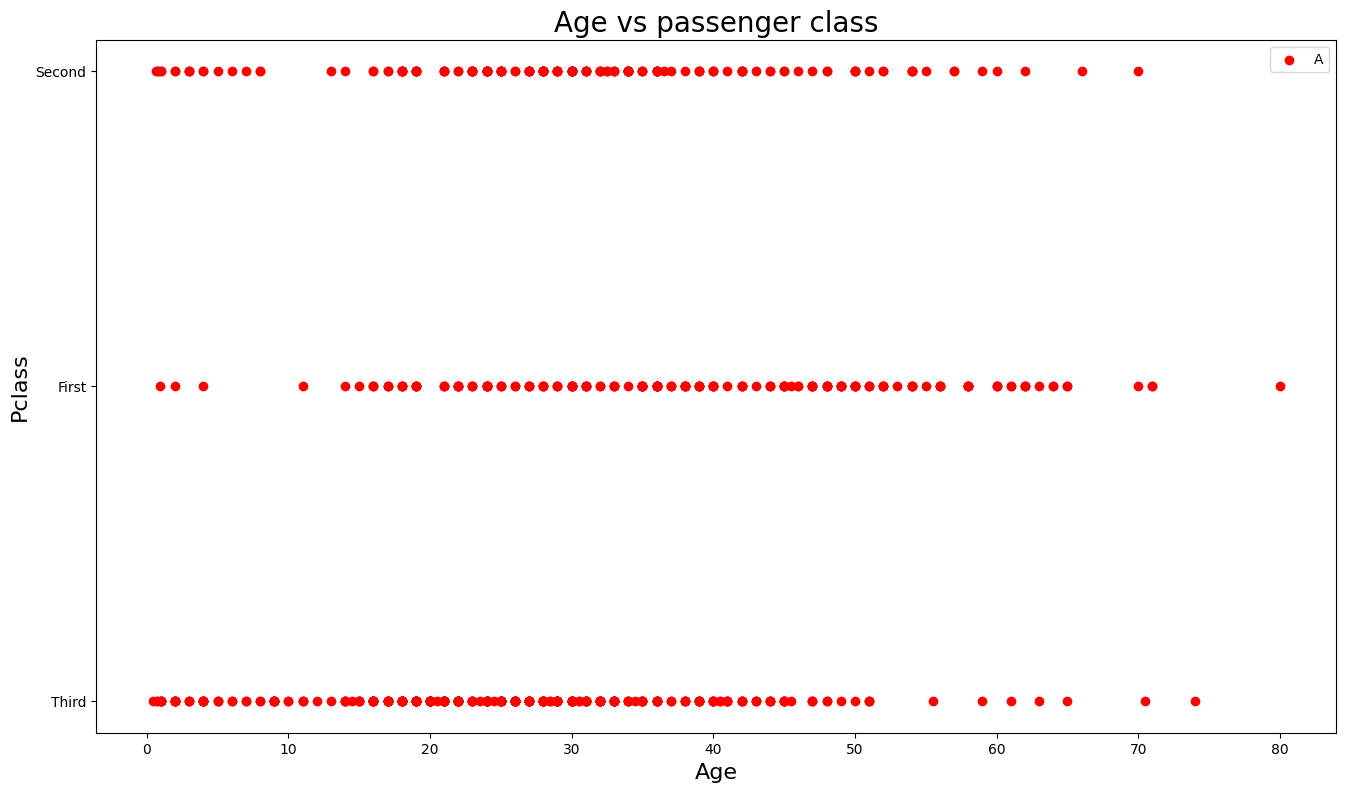

In [139]:
plt.figure(figsize=(16,9))
plt.scatter(df['age'],df['class'],c='r')
plt.title("Age vs passenger class",fontsize=20)
plt.xlabel("Age",fontsize=16)
plt.ylabel("Pclass",fontsize=16)
plt.legend("Age")
plt.show()

## Passenger Distribution by Embarkation Town:

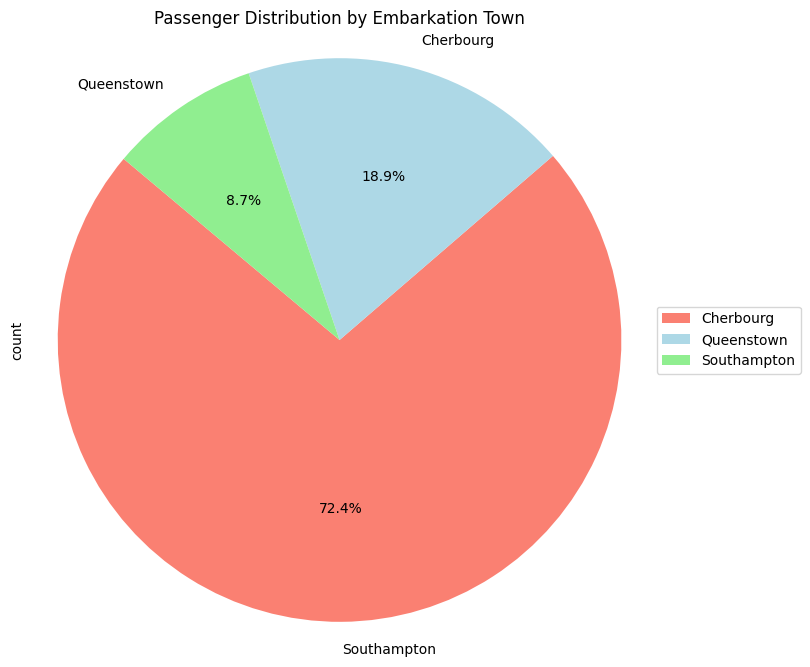

In [143]:
# Group by embarkation town and count passengers
embarkation_counts = df["embark_town"].value_counts()

# Colors for each town
colors = ["salmon", "lightblue", "lightgreen"]

# Create the pie chart
plt.figure(figsize=(8, 8))
embarkation_counts.plot(kind="pie", autopct="%1.1f%%", startangle=140, colors=colors)
plt.title("Passenger Distribution by Embarkation Town")
plt.axis("equal")
plt.legend(labels=["Cherbourg", "Queenstown", "Southampton"], loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()

## Age Distribution (Categorized) 

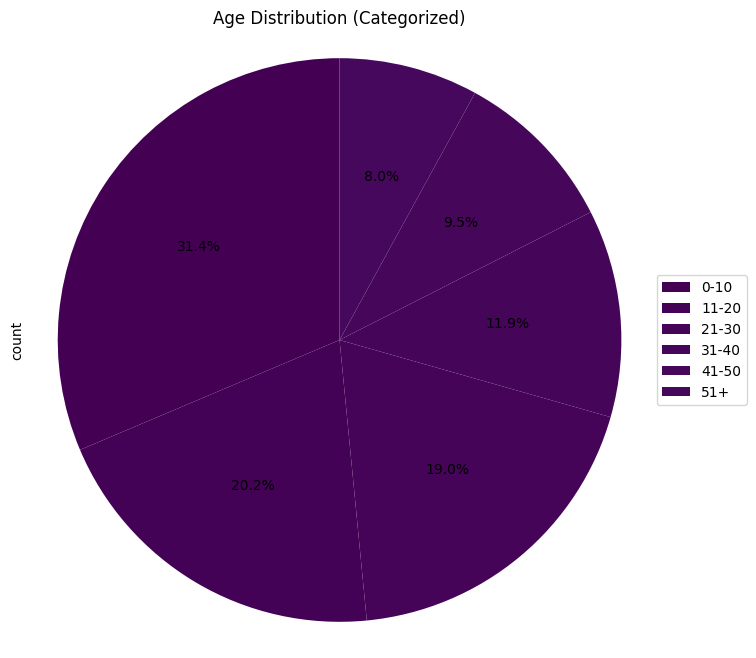

In [145]:
age_categories = ["0-10", "11-20", "21-30", "31-40", "41-50", "51+"]

# Count passengers in each category
age_counts = pd.cut(df["age"], bins=[0, 11, 21, 31, 41, 51, 100]).value_counts()

# Colors for each category
colors = plt.cm.viridis(range(len(age_categories)))

# Create the pie chart
plt.figure(figsize=(8, 8))
age_counts.plot(kind="pie", autopct="%1.1f%%", startangle=90, colors=colors, labels=None)
plt.title("Age Distribution (Categorized)")
plt.axis("equal")
plt.legend(labels=age_categories, loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()

# Thank you !!